## 1. Introduction

## 2. Libraries

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Import Data
#df_credit = pd.read_csv("./input/german-credit-data-with-risk/german_credit_data.csv", index_col=0)
df_credit = pd.read_csv("./input/target/german_credit_data.csv", index_col=0)

## 3. First Look at the Data

Looking at the type of data  
Null numbers  
Unique Values  
The First Rows of our dataset  

In [7]:
print(df_credit.info());

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [8]:
#looking unique values
print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [9]:
print(df_credit.head())

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


## 4. Some Explorations

* Starting by distribution of column Age
* Some Seaborn graphical
* Columns crossing

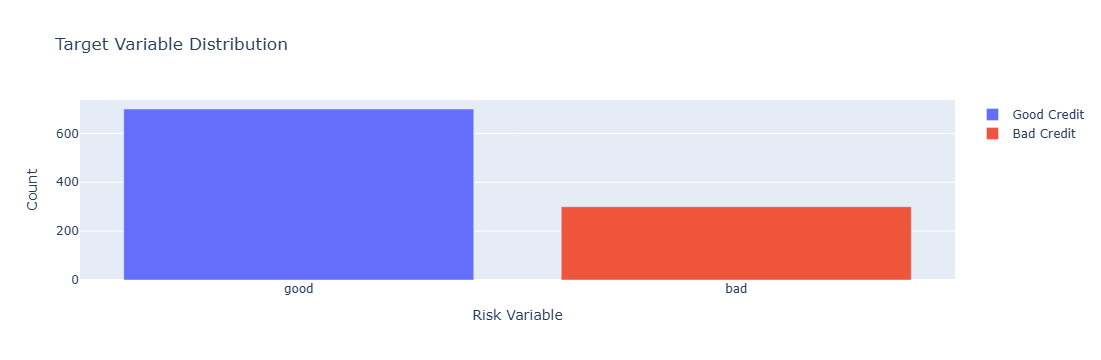

In [12]:
#
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter

trace0=go.Bar(
    x=df_credit[df_credit["Risk"] == 'good']['Risk'].value_counts().index.values,
    y=df_credit[df_credit["Risk"] == 'good']['Risk'].value_counts().values,
    name= 'Good Credit'
    )

trace1 = go.Bar(
    x=df_credit[df_credit["Risk"]=='bad']["Risk"].value_counts().index.values,
    y=df_credit[df_credit["Risk"]=='bad']["Risk"].value_counts().values,
    name="Bad Credit"
)

data = [trace0,trace1]

layout = go.Layout(
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target Variable Distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

C:\Users\alist\anaconda3\Lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



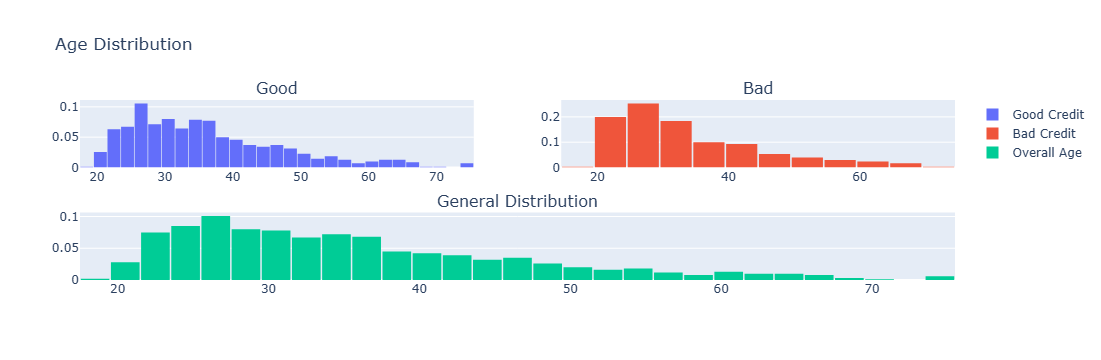

In [13]:
df_good = df_credit[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()


#First Plot
trace0 = go.Histogram(
    x=df_good, 
    histnorm='probability',
    name="Good Credit"
)

#Second Plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)

#Third Plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{},{}],[{'colspan':2},None]],
                        subplot_titles=('Good','Bad','General Distribution'))

#setting the figs
fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)
fig.append_trace(trace2,2,1)

fig['layout'].update(showlegend=True, title='Age Distribution',bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\alist\AppData\Local\Temp\ipykernel_4312\568116142.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\alist\AppData\Local\Temp\ipykernel_4312\568116142.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




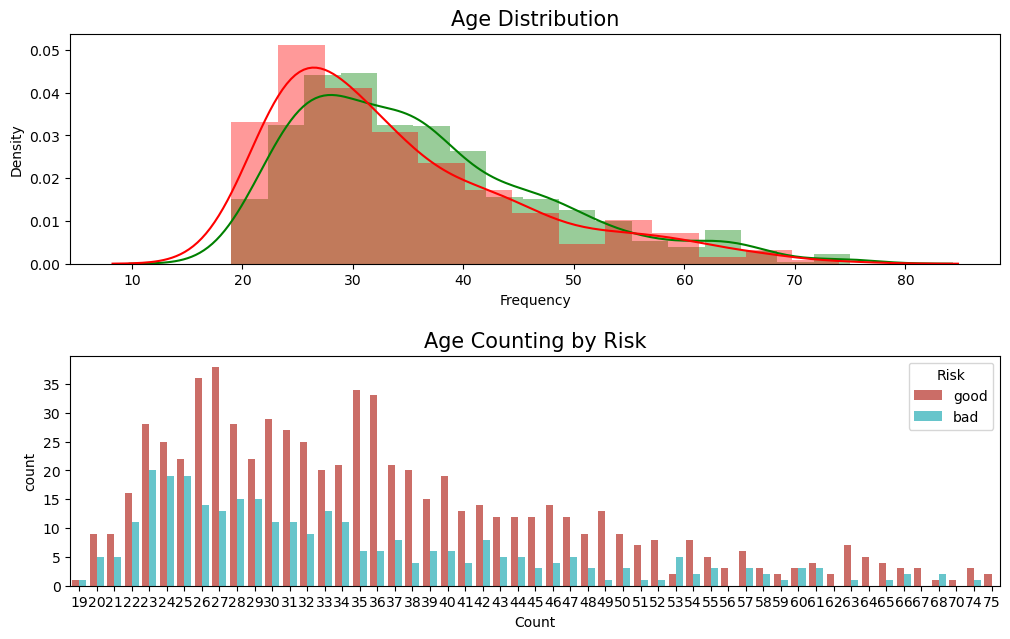

In [28]:
df_good = df_credit[df_credit["Risk"]=="good"]
df_bad = df_credit[df_credit["Risk"]=="bad"]

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace=0.4, top=0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], color="r")
g1.set_title("Age Distribution", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")


g2 = sns.countplot(x="Age", data=df_credit,
                  palette="hls",ax=ax[1],
                  hue="Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

#### Create a categorical variable to handle the Age Variable

In [33]:
#Define the ranges for the credit amount column.
interval=(18,25,35,60,120)

cat = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age Cat"] = pd.cut(df_credit.Age, interval, labels=cat)

df_good = df_credit[df_credit["Risk"]=="good"]
df_bad = df_credit[df_credit[
